In [2]:
from plotnine import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from data import *
import warnings
warnings.filterwarnings('ignore')
theme_set(theme_light())

%matplotlib inline

C:\Python\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


# bar Plot

## Basic Bar Plot

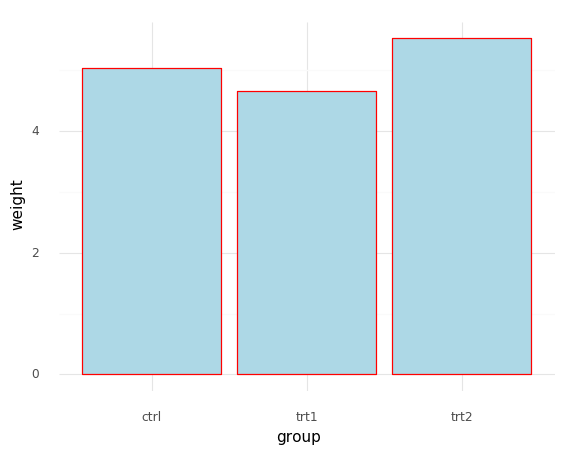

<ggplot: (-9223371930732183797)>

In [21]:
(ggplot(pg_mean,aes(x='group',y='weight')) + 
 geom_bar(stat='identity',fill='lightblue',color='red') + theme_minimal()
)
# (ggplot(pg_mean,aes(x='group',y='weight')) + geom_bar(stat='identity',fill='lightblue',color='red')).save(filename='bar_plot.png')

Save Method:
```python
save(filename=None, format=None, path=None, width=None, height=None, units='in', dpi=None, limitsize=True, **kwargs)[source]
Save a ggplot object as an image file
```
```
Parameters:	
filename (str or file) – File name or file to write the plot to.
format (str) – Image format to use, automatically extract from file name extension.
path (str) – Path to save plot to (if you just want to set path and not filename).
width (number) – Width (defaults to the width of current plotting window).
height (number) – Height (defaults to the height of current plotting window).
units (str) – Units for width and height when either one is explicitly specified (in, cm, or mm).
dpi (float) – DPI to use for raster graphics. If None, defaults to using the dpi of theme, if none is set then a dpi of 100.
limitsize (bool) – If True (the default), ggsave will not save images larger than 50x50 inches, to prevent the common error of specifying dimensions in pixels.
kwargs (dict) – Additional arguments to pass to matplotlib savefig().
```

## Bar Plot with Categorical Variable - factor()

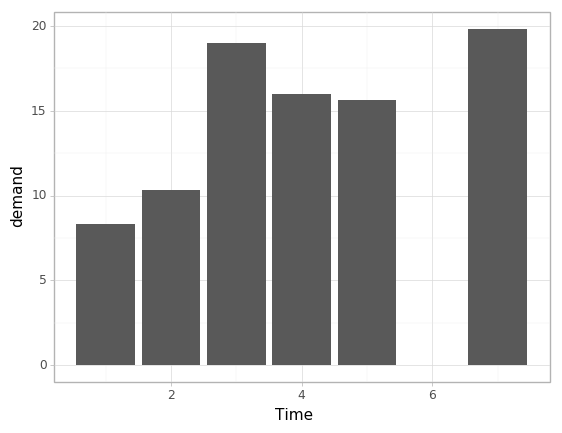

<ggplot: (-9223371930732141368)>

In [22]:
(ggplot(BOD,aes(x='Time',y='demand')) +
 geom_bar(stat='identity')
)

convert the continuous variable to a discrete variable by using factor()

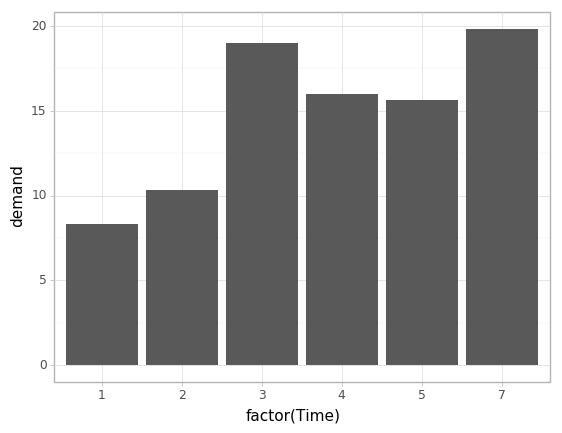

<ggplot: (106122658610)>

In [23]:
(ggplot(BOD,aes(x='factor(Time)',y='demand')) +
 geom_bar(stat='identity')
)

## Group Bars - dodge

 variables that are mapped to thefill color of bars must be categorical 

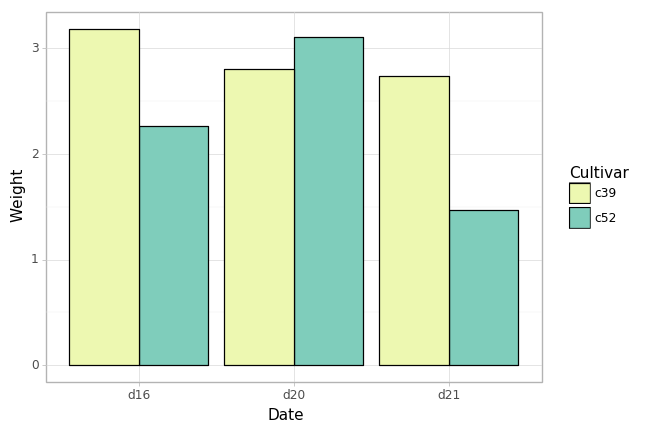

<ggplot: (-9223371930732153077)>

In [24]:
(ggplot(cabbage_exp,aes('Date','Weight',fill='Cultivar')) +
 geom_bar(stat='identity',position='dodge',color='black') +
 scale_fill_brewer(palette='YlGnBu')
)

## Bar Plot of Counts & Bin Width

make the bars narrower or wider, set width in geom_bar()

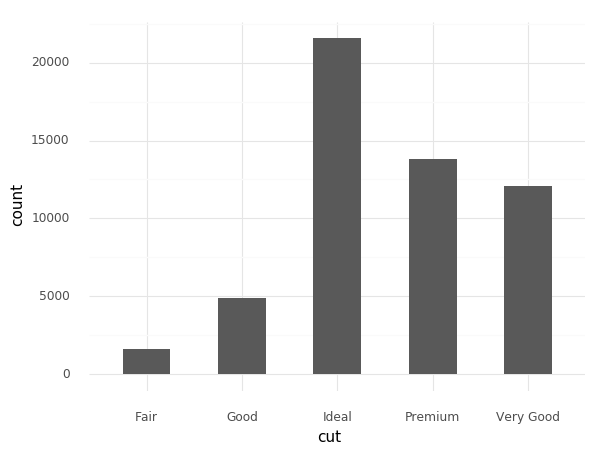

<ggplot: (-9223371930732147603)>

In [25]:
(ggplot(diamonds,aes('cut')) +
 geom_bar(width=0.5) + theme_minimal()
)

## Using Color in Bar Plot

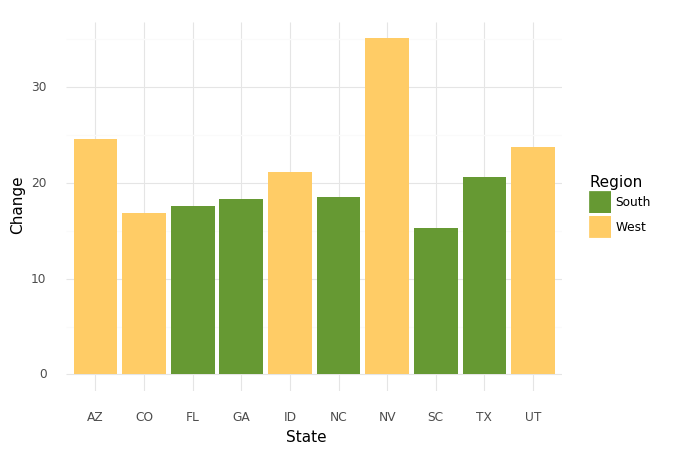

<ggplot: (106122946084)>

In [26]:
(ggplot(upc,aes('Abb','Change',fill='Region')) +
 geom_bar(stat='identity')+theme_minimal() +
 scale_fill_manual(values=["#669933", "#FFCC66"]) +
 xlab("State")
)

## Coloring Negative and Positive Bars Differently

use position="identity" with the bars. This will prevent a warning message about stacking not being well defined for negative numbers:

In [27]:
csub['pos'] = csub['Anomaly10y']>=0

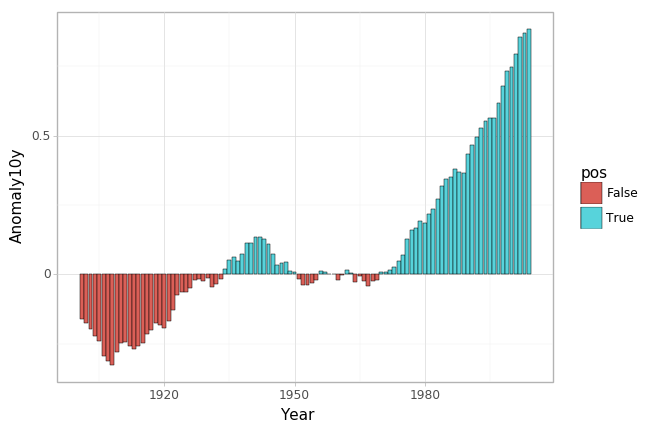

<ggplot: (-9223371930731920780)>

In [28]:
(ggplot(csub,aes('Year','Anomaly10y',fill='pos')) +
 geom_bar(stat='identity',position='identity',color='black',size=0.2)
)

## Stacked Bar Plot

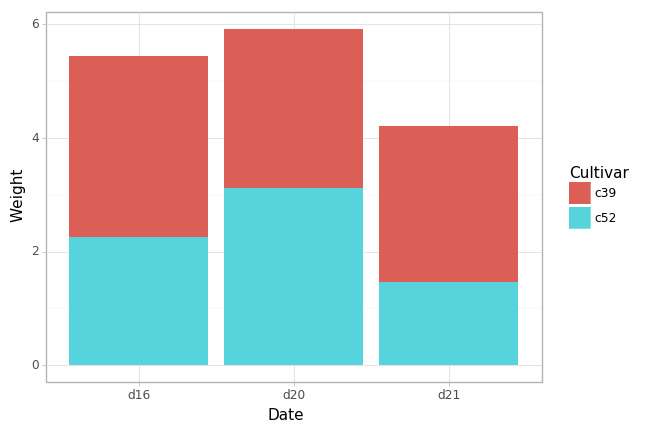

<ggplot: (106122870606)>

In [29]:
(ggplot(cabbage_exp,aes('Date','Weight',fill='Cultivar')) +
 geom_bar(stat='identity')
)

## Proportional Stacked Bar Plot

In [30]:
ce

,Cultivar,Date,Weight,sd,n,se,percent_weight
1,c39,d16,3.18,0.956614,10,0.302508,58.455882
2,c39,d20,2.80,0.278887,10,0.088192,47.377327
3,c39,d21,2.74,0.983418,10,0.310984,65.083135
4,c52,d16,2.26,0.445222,10,0.140791,41.544118
5,c52,d20,3.11,0.790850,10,0.250089,52.622673
6,c52,d21,1.47,0.211082,10,0.066750,34.916865


In [31]:
ce.groupby('Date').transform(lambda x:x / x.sum() * 100)["Weight"]

1    58.455882
2    47.377327
3    65.083135
4    41.544118
5    52.622673
6    34.916865
Name: Weight, dtype: float64

In [32]:
ce = cabbage_exp.copy()
ce['percent_weight'] = ce.groupby('Date').transform(lambda x:x / x.sum() * 100)["Weight"]
# ce['percent_weight'] = ce['Weight'] / ce['Weight'].sum() *100

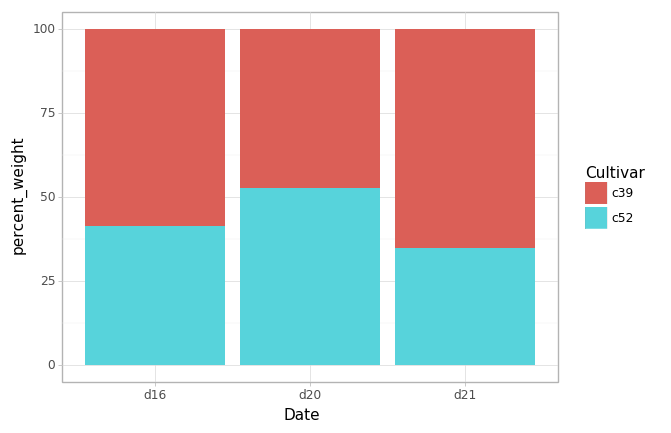

<ggplot: (106122982008)>

In [33]:
(ggplot(ce,aes('Date','percent_weight',fill='Cultivar')) + 
 geom_bar(stat='identity')
)

## Bar Plot with Labels

>ha : str (default: center)  
>Horizontal alignment. One of *left*, *center* or *right.*  
>va : str (default: center)  
>Vertical alignment. One of *top*, *center* or *bottom.*

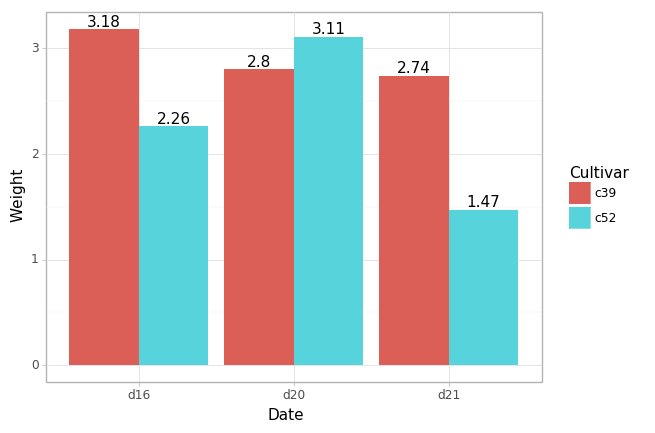

<ggplot: (-9223371930731767352)>

In [34]:
(ggplot(cabbage_exp,aes('Date','Weight',fill='Cultivar')) +
 geom_bar(stat='identity',position='dodge') +
 geom_text(aes(label='Weight'),va='bottom',position=position_dodge(0.9))
)
# position=position_dodge(0.9) for dodge style

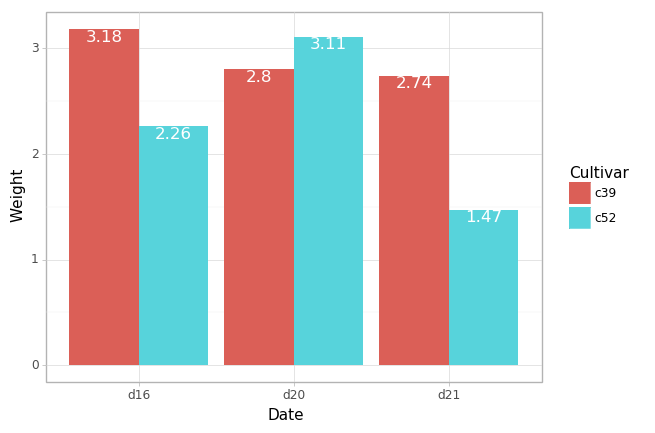

<ggplot: (-9223371930731492790)>

In [35]:
(ggplot(cabbage_exp,aes('Date','Weight',fill='Cultivar')) +
 geom_bar(stat='identity',position='dodge') +
 geom_text(aes(label='Weight'),va='top',color='white',size=12,position=position_dodge(0.9))
)
# position=position_dodge(0.9) for dodge style

In [36]:
ce2 = cabbage_exp
ce2.sort_values('Cultivar',ascending=False,inplace=True)
ce2['label_y']=ce2.groupby('Date')['Weight'].transform('cumsum')

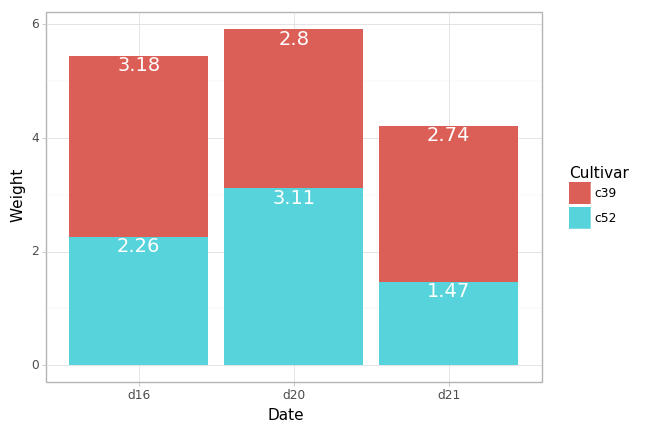

<ggplot: (-9223371930731489129)>

In [37]:
(ggplot(ce2,aes('Date','Weight',fill='Cultivar')) + 
 geom_bar(stat='identity') +
 geom_text(aes(y='label_y',label='Weight'),va='top',color='white',size=14)
)

## -_- Dot Plot  --- can't use reorder

In [38]:
tophit = tophitters2001.iloc[1:25,:].copy()
tophit.sort_values('avg',inplace=True)

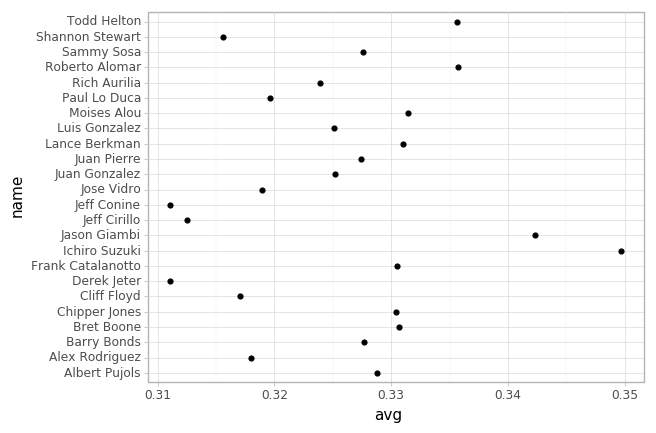

<ggplot: (106122952270)>

In [39]:
(ggplot(tophit,aes(x='avg',y='name')) +
 geom_point()
)

## bar plot with other layers --- When the automatic groups are not sufficient

In [3]:
df = pd.DataFrame({
    'letter': ['Alpha', 'Beta', 'Delta', 'Gamma'],
    'pos': [1, 2, 3, 4],
    'num_of_letters': [5, 4, 5, 5]
})

df

,letter,num_of_letters,pos
0,Alpha,5,1
1,Beta,4,2
2,Delta,5,3
3,Gamma,5,4


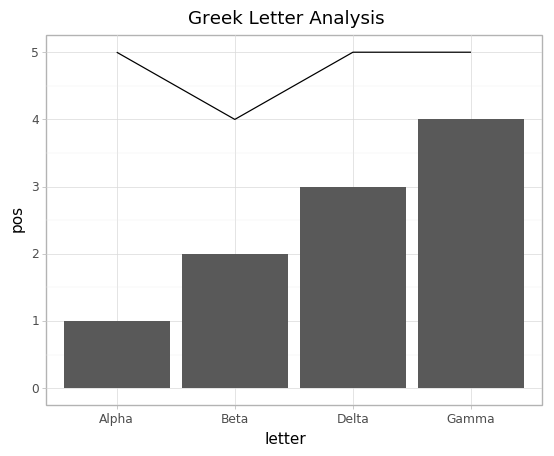

<ggplot: (-9223371936538125126)>

In [5]:
(ggplot(df)
 + geom_col(aes(x='letter', y='pos'))
 + geom_line(aes(x='letter', y='num_of_letters'),group=1) # to manually set the group for geom_line so that all points belong to one group.
 + ggtitle('Greek Letter Analysis')
)

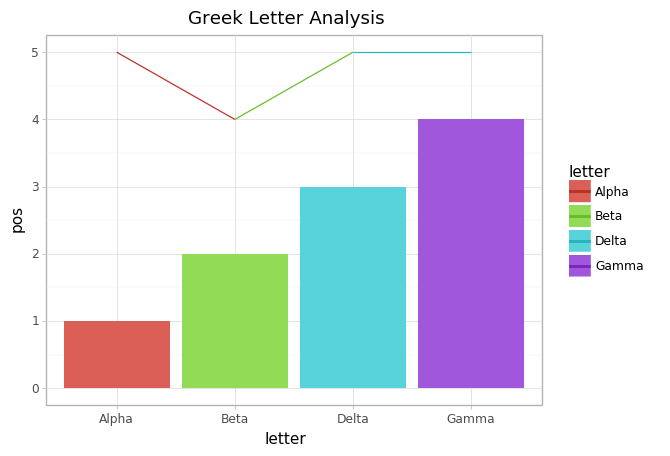

<ggplot: (100319370700)>

In [15]:
(ggplot(df) + 
 geom_col(aes(x='letter',y='pos', fill='letter')) +
 geom_line(aes(x='letter', y='num_of_letters', color='letter'), group=1) + 
 scale_color_hue(l=0.45) +  # some contrast to make the lines stick out  
 ggtitle('Greek Letter Analysis')
)